In [1]:
import npdists
import numpy as np

First we'll create a [multivariate gaussian](../api/MVGaussian.md) distribution by providing the means and covariances of three parameters.

In [2]:
mvg = npdists.mvgaussian([5,10, 12], 
                         np.array([[ 1., 1., -1.], [1, -1, 1], [-1., 1.,  1.]]),
                         label=['a', 'b', 'c'])

We can then easily access the means and covariances and see that they exactly match what we set.

In [3]:
mvg.means

[5, 10, 12]

In [4]:
mvg.covariances

array([[ 1.,  1., -1.],
       [ 1., -1.,  1.],
       [-1.,  1.,  1.]])

and plotting will now show a corner plot (if [corner](https://corner.readthedocs.io/en/latest/) is installed)

/home/kyle/.local/lib/python2.7/site-packages/npdists-0.1.0.dev0-py2.7.egg/npdists/npdists.py:1046: RuntimeWarning: covariance is not positive-semidefinite.


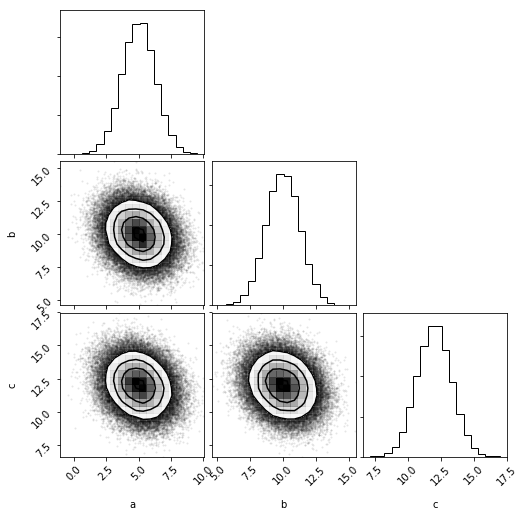

In [5]:
fig = mvg.plot(show=True)

we can now convert this multivariate gaussian distribution into a [multivariate histogram](../api/MVHistogram.md) distribution

In [6]:
mvh = mvg.to_mvhistogram()

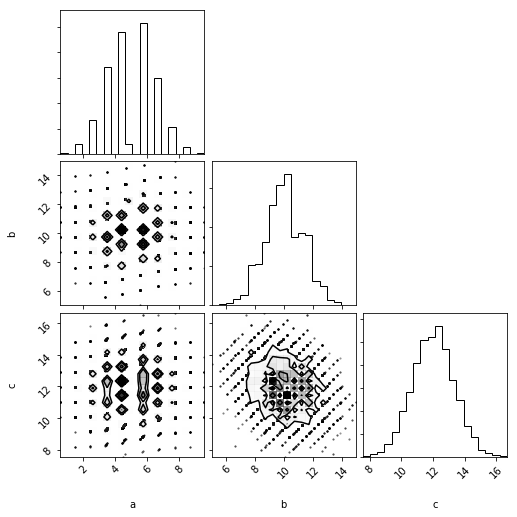

In [7]:
fig = mvh.plot(show=True)

Now if we access the means and covariances, we'll see that they are slightly different due to the binning.

In [8]:
mvh.means

[4.207925329640558, 9.901886055854968, 12.07900800784467]

In [9]:
mvh.covariances

array([[ 2.41760335,  0.08395569,  0.01698019],
       [ 0.08395569,  1.83470061, -0.3313369 ],
       [ 0.01698019, -0.3313369 ,  1.68092463]])

If we convert back to a multivariate gaussian, these are the means and covariances that will be adopted.

In [10]:
mvhg = mvh.to_mvgaussian()

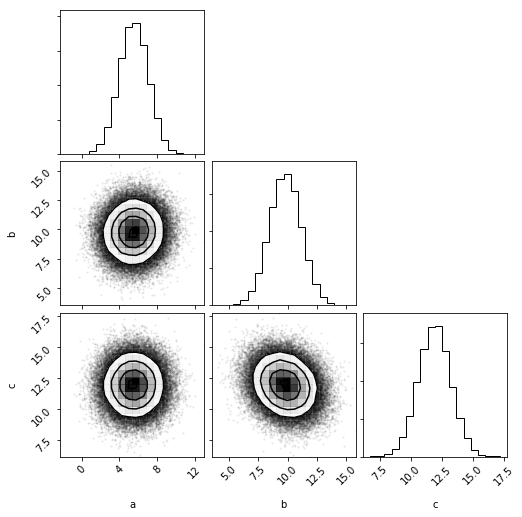

In [11]:
fig = mvhg.plot(show=True)

In [12]:
mvhg.means

[5.514695059691962, 9.803435593563423, 11.912365669206533]

In [13]:
mvhg.covariances

array([[ 2.42604224,  0.0876917 ,  0.01257994],
       [ 0.0876917 ,  1.83847766, -0.32731584],
       [ 0.01257994, -0.32731584,  1.68291575]])